Importing the Dependencies

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Data collection and preprocessing

In [344]:
#Loading the database to the pandas dataframe
loan_df=pd.read_csv('/content/drive/MyDrive/loan_dataset.csv')

In [345]:
#printing the first 5 rows of dataframe
loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [346]:
loan_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [347]:
#replace 3+ to 4.
#loan_df['Dependents'].replace(['3+'], '3',inplace=True)
loan_df['Dependents'].replace(
    to_replace=['3+',],
    value='4',
    inplace=True
)

In [348]:
loan_df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [349]:
loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [350]:
loan_df['Loan_Status'].shape

(614,)

In [351]:
exit#number of rows and column
loan_df.shape

(614, 13)

In [352]:
#statistical measure
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [353]:
#checking null values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [354]:
loan_df['Loan_Status'].shape

(614,)

In [355]:
#dropping missing values
loan_df=loan_df.dropna()

In [356]:
loan_df['Loan_Status'].shape

(480,)

In [357]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data Visualization

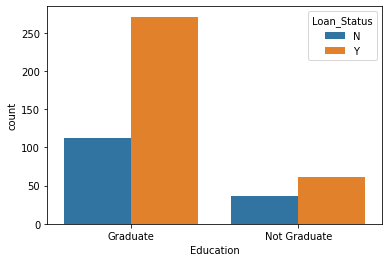

In [358]:
#education and Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_df)

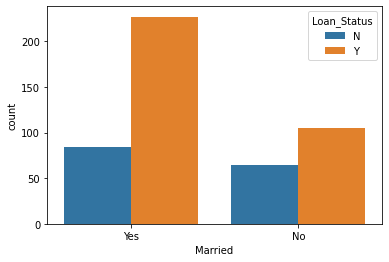

In [359]:
#Married and Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_df)

Label encoding


In [360]:
label=LabelEncoder()

In [361]:
loan_df['Loan_Status']=label.fit_transform(loan_df.Loan_Status)
loan_df['Loan_ID']=label.fit_transform(loan_df.Loan_ID)
loan_df['Gender']=label.fit_transform(loan_df.Gender)
loan_df['Married']=label.fit_transform(loan_df.Married)
loan_df['Education']=label.fit_transform(loan_df.Education)
loan_df['Self_Employed']=label.fit_transform(loan_df.Self_Employed)
loan_df['Property_Area']=label.fit_transform(loan_df.Property_Area)

In [362]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    int64  
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 68.7+ KB


In [363]:
type(loan_df)

pandas.core.frame.DataFrame

Standrization of Dataset

In [364]:
scaler=MinMaxScaler()

In [365]:
loan_df_norm=pd.DataFrame(scaler.fit_transform(loan_df),columns=loan_df.columns).iloc[:,0:12]

In [366]:
loan_df_norm.shape

(480, 12)

In [367]:
loan_df_norm.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.000000,1.0,1.0,0.25,0.0,0.0,0.054830,0.044567,0.201354,0.72973,1.0,0.0
1,0.002088,1.0,1.0,0.00,0.0,1.0,0.035250,0.000000,0.096447,0.72973,1.0,1.0
2,0.004175,1.0,1.0,0.00,1.0,0.0,0.030093,0.069687,0.187817,0.72973,1.0,1.0
3,0.006263,1.0,0.0,0.00,0.0,0.0,0.072356,0.000000,0.223350,0.72973,1.0,1.0
4,0.008351,1.0,1.0,0.50,0.0,1.0,0.065145,0.124006,0.436548,0.72973,1.0,1.0


In [368]:
loan_df_norm.shape

(480, 12)

In [369]:
loan_df.shape

(480, 13)

In [370]:
#Reset the index value
loan_df.reset_index(drop=True, inplace=True)

In [371]:
loan_df['Loan_Status']

0      0
1      1
2      1
3      1
4      1
      ..
475    1
476    1
477    1
478    1
479    0
Name: Loan_Status, Length: 480, dtype: int64

Separating the dataset

In [372]:
X=loan_df_norm
Y=loan_df.iloc[:,12]

In [373]:
Y

0      0
1      1
2      1
3      1
4      1
      ..
475    1
476    1
477    1
478    1
479    0
Name: Loan_Status, Length: 480, dtype: int64

Train and Test Split

In [374]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [375]:
print(X.shape,x_train.shape,x_test.shape)

(480, 12) (384, 12) (96, 12)


Training the model

Support Vector Machine

In [376]:
classifier=svm.SVC(kernel='linear')

In [377]:
#Training the support vector machine
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation


In [378]:
#accuracy score on traning data
x_train_prediction=classifier.predict(x_train)
x_train_accuracy=accuracy_score(x_train_prediction,y_train)


In [379]:
print("accuracy on training data ",x_train_accuracy)

accuracy on training data  0.8203125


In [380]:
#accuracy on trining data
x_test_prediction=classifier.predict(x_test)
x_test_accuracy=accuracy_score(x_test_prediction,y_test)

In [381]:
print("accuracy score on test data ",x_test_accuracy)

accuracy score on test data  0.7604166666666666


Making Predictive system

In [382]:
input=(0.000000	,1.0,	1.0,	0.25,	0.0,	0.0,	0.054830,	0.044567,	0.201354,	0.72973,	1.0,	0.0)

input_data_nparray=np.asarray(input)

input_data_reshape=input_data_nparray.reshape(1,-1)

prediction=classifier.predict(input_data_reshape)
print(prediction)
if(prediction==1):
  print("This person has filled the loan amount")

else:
  print('This person has not filled the loan amount')  


[1]
This person has filled the loan amount


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
